# Technical Report- Timers Lab Jessica Allen 10/3

## Methods

For each set of data (using logging statements and oscilloscope), 9 data points were sampled. The following procedure was used to collect each set of data:

### Logging Data Collection
k_uptime_get was used to obtain the entire period for each frequency tested as a if then statement was included inside the timer handler function. Thus, the values generated by the logging statements needed to be divided by 2 to obtain the time that the led was "on" or active for a single cycle. The time to complete each 1 "blink" (9 samples for each) was documented for the heartbeat LED, and the action LEDs at 1Hz, 2Hz, and 5Hz.

### Oscilloscope Data Collection
Data was collected for the heartbeat LED, and the buzzer LED at 1Hz, 2Hz, and 5Hz. Given that the action LEDs are blinking out of phase at the same rate, only one action LED was sampled (as the data output will be very similar/if not the same for both action LEDs, especially given the simplicity of what we are asking the device to do. 9 data points were also sampled (note that this is the amount of points that was sampled by the heartbeat which is the minimum amount of points obtained during the experiment).

### Interpreting the data
The data was compiled into two separate csv files (logging and oscilloscope data) and juxtaposed with the "actual" values vs the "experimental" values.  The logging data was taken directly from the logging statements in the terminal (and divided by 2 to get the time the LEDs were in the "on" state) while for the oscilloscope data, the raw data was analyzed (voltage vs. time) and the elapsed time for each cycle was noted (i.e. when the voltage amount "jumped" and the time at which this event occured).

## Results

Loading in .csv files for both logging and oscilloscope data

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the data
#logging
logging_data = pd.read_csv('Logging_statements.csv')

#oscilloscope
osc_data = pd.read_csv('OSC_data.csv')


# Print the first few rows of the data
logging_data.head(20)


,Heartbeat actual (ms),Heartbeat logged (ms),Buzzer 1Hz actual (ms),Buzzer 1Hz logged (ms),Buzzer 2Hz actual (ms),Buzzer 2Hz logged (ms),Buzzer 5Hz actual (ms),Buzzer 5Hz logged (ms)
0,500,500,500,500,250,250.5,100,100
1,500,500,500,500,250,250.0,100,100
2,500,500,500,500,250,250.0,100,100
3,500,500,500,500,250,250.0,100,100
4,500,500,500,500,250,250.0,100,100
5,500,500,500,500,250,250.0,100,100
6,500,500,500,500,250,250.0,100,100
7,500,500,500,500,250,250.0,100,100
8,500,500,500,500,250,250.0,100,100


In [ ]:
#printing for oscilloscope data
osc_data.head(20)

,Heartbeat actual (ms),Heartbeat measured (ms),Buzzer 1Hz actual (ms),Buzzer 1Hz measured (ms),Buzzer 2Hz actual (ms),Buzzer 2Hz measured (ms),Buzzer 5Hz actual (ms),Buzzer 5Hz measured (ms)
0,500,500,500,500,250,250,100,100
1,500,500,500,500,250,250,100,100
2,500,500,500,500,250,250,100,100
3,500,500,500,500,250,250,100,100
4,500,500,500,500,250,250,100,100
5,500,500,500,500,250,250,100,100
6,500,500,500,500,250,250,100,100
7,500,500,500,500,250,250,100,100
8,500,500,500,500,250,250,100,100


## Comparing ideal values with experimental values

Starting with logging data- we get basic statistics for heartbeat and 1Hz, 2Hz, and 5Hz for buzzer

In [ ]:
logging_data.groupby('Heartbeat actual (ms)')['Heartbeat logged (ms)'].describe()

,count,mean,std,min,25%,50%,75%,max
Heartbeat actual (ms),,,,,,,,
500,9.0,500.0,0.0,500.0,500.0,500.0,500.0,500.0


In [ ]:
logging_data.groupby('Buzzer 1Hz actual (ms)')['Buzzer 1Hz logged (ms)'].describe()

,count,mean,std,min,25%,50%,75%,max
Buzzer 1Hz actual (ms),,,,,,,,
500,9.0,500.0,0.0,500.0,500.0,500.0,500.0,500.0


In [ ]:
logging_data.groupby('Buzzer 2Hz actual (ms)')['Buzzer 2Hz logged (ms)'].describe()

,count,mean,std,min,25%,50%,75%,max
Buzzer 2Hz actual (ms),,,,,,,,
250,9.0,250.055556,0.166667,250.0,250.0,250.0,250.0,250.5


In [ ]:
logging_data.groupby('Buzzer 5Hz actual (ms)')['Buzzer 5Hz logged (ms)'].describe()

,count,mean,std,min,25%,50%,75%,max
Buzzer 5Hz actual (ms),,,,,,,,
100,9.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0


Doing basic analysis of oscilloscope data for all experimental combinations (heartbeat, action LEDs at 1Hz, 2Hz, 5Hz)

In [ ]:
osc_data.groupby('Heartbeat actual (ms)')['Heartbeat measured (ms)'].describe()

,count,mean,std,min,25%,50%,75%,max
Heartbeat actual (ms),,,,,,,,
500,9.0,500.0,0.0,500.0,500.0,500.0,500.0,500.0


In [ ]:
osc_data.groupby('Buzzer 1Hz actual (ms)')['Buzzer 1Hz measured (ms)'].describe()

,count,mean,std,min,25%,50%,75%,max
Buzzer 1Hz actual (ms),,,,,,,,
500,9.0,500.0,0.0,500.0,500.0,500.0,500.0,500.0


In [ ]:
osc_data.groupby('Buzzer 2Hz actual (ms)')['Buzzer 2Hz measured (ms)'].describe()

,count,mean,std,min,25%,50%,75%,max
Buzzer 2Hz actual (ms),,,,,,,,
250,9.0,250.0,0.0,250.0,250.0,250.0,250.0,250.0


In [ ]:
osc_data.groupby('Buzzer 5Hz actual (ms)')['Buzzer 5Hz measured (ms)'].describe()

,count,mean,std,min,25%,50%,75%,max
Buzzer 5Hz actual (ms),,,,,,,,
100,9.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0


### How to Calculate 95% Confidence Interval for a Mean
note we can only calculate the confidence interval for our 2Hz buzzer measurement for the logging data as this is the only column of data where there is slight variation, a confidence interval is unable to be calculated when all of the data is uniform (see further explanation in the conclusion for the lack of variation in the data)

In [ ]:
# calculate the 95% confidence intervals
confidence_interval = logging_data.groupby('Buzzer 2Hz actual (ms)')['Buzzer 2Hz logged (ms)'].apply(
    lambda x: sp.stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=sp.stats.sem(x))
)
print(confidence_interval)

Buzzer 2Hz actual (ms)
250    (249.92744421472037, 250.18366689639072)
Name: Buzzer 2Hz logged (ms), dtype: object


In [ ]:
# calculate the 95% confidence intervals
#confidence_interval_osc = osc_data.groupby('Ideal Period (ms)')['Measurement Period (ms)'].apply(
    #lambda x: sp.stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=sp.stats.sem(x))
#)
#print(confidence_interval_osc)

## Conclusions (for timers lab)

Although we obtained a similar confidence interval for both sets of data it can be noted that the oscilloscope is a more robust method to calculate the accuracy of the LEDs. When logging, it can be noted that there is lag when switching frequency speeds/states and outputting logging statements in general. When switching from different speeds/states the frequencies of both the heartbeat and action leds would temporarily become inaccurate and then settle (note that these switches were not included in the data and the statements were settled when the data was collected). 

Note that given the current functionality of the code, the tasks instructed for the microcontroller to process are fairly simple, which means that there should not be a great amount of variation observed in the logging statements. Thus, there was not almost any variation seen in this case. However, slightly more resolution could be seen by analyzing this data in terms of nanoseconds. When the device becomes more complex, however, the timing of the blinking could decrease in precision. This variation can be further controlled by ensuring that your tasks/commands are given to the device in hierarchical manner, so blocking is minimized.

### FOR FUTURE LAB: How to Plot Hex Data

In [ ]:
# `hexdump.txt`` was copied from `LOG_HEXDUMP` terminal output
# we know this is a hexdump of int16 values storing 12-bit data
from bme554 import read_hex_data

hex_data = read_hex_data('hexdump.txt')

print(f'Raw Bytes of Data: {hex_data}')

Raw Bytes of Data: ['99', '01', '47', '01', 'f4', '00', 'a9', '00', '72', '00', '3c', '00', '19', '00', 'ff', 'ff', 'fc', 'ff', '04', '00', '1c', '00', '3f', '00', '72', '00', 'af', '00', 'f4', '00', '46', '01', '9c', '01', 'f4', '01', '50', '02', 'ad', '02', '03', '03', '4e', '03', '98', '03', 'd7', '03', '06', '04', '29', '04', '3e', '04', '44', '04', '3d', '04', '1f', '04', '00', '04', 'c7', '03', '8a', '03', '40', '03', 'ed', '02', '92', '02', '3b', '02', 'e3', '01', '88', '01', '2c', '01', 'e3', '00', 'a2', '00', '67', '00', '37', '00', '14', '00', 'fd', 'ff', 'f8', 'ff', '07', '00', '22', '00', '49', '00', '91', '00', 'bb', '00', '07', '01', '55', '01', 'ae', '01', '08', '02', '64', '02', 'bd', '02', '12', '03', '5e', '03', 'a4', '03', 'df', '03', '0f', '04', '2f', '04', '3f', '04', '45', '04', '39', '04', '1c', '04', 'f6', '03', 'c0', '03', '7c', '03', '30', '03', 'e1', '02', '86', '02', '2b', '02', 'd1', '01', '61', '01', '28', '01', 'd6', '00', '94', '00', '57', '00', '30', '0

Text(0.5, 1.0, 'Extracted Raw Voltage Data from Hexdata Dump')

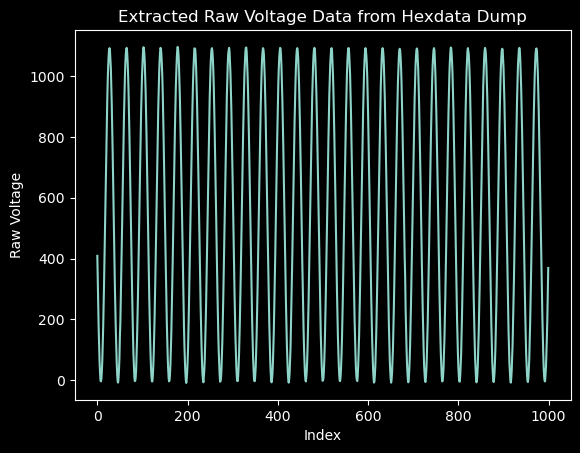

In [ ]:
from bme554 import unwrap_twos_complement
raw_voltage = unwrap_twos_complement(hex_data)

plt.plot(raw_voltage)
plt.xlabel('Index')
plt.ylabel('Raw Voltage')
plt.title('Extracted Raw Voltage Data from Hexdata Dump')

## How to Perform a Linear Regression

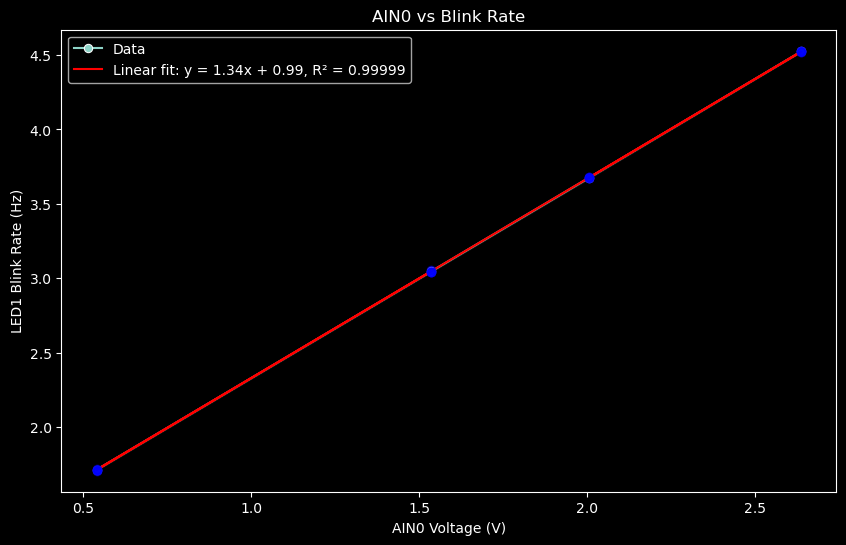

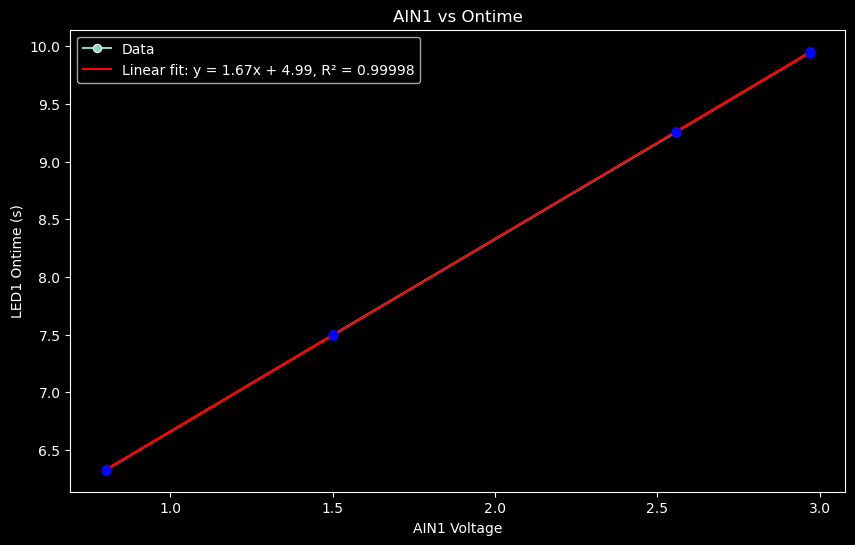

In [ ]:
from bme554 import plot_with_fit

file_path = 'linear_regression_data.csv'
data = pd.read_csv(file_path)

# Plotting for AIN0 vs Blink Rate
plot_with_fit(data['AIN0 Voltage (V)'], data['Blink Rate (Hz)'], 'AIN0 Voltage (V)', 'LED1 Blink Rate (Hz)', 'AIN0 vs Blink Rate')

# Plotting for AIN1 vs Ontime
plot_with_fit(data['AIN1 Voltage'], data['Ontime (s)'], 'AIN1 Voltage', 'LED1 Ontime (s)', 'AIN1 vs Ontime')

In [ ]:
from bme554 import calculate_confidence_intervals

# Calculate and print confidence intervals for AIN0 vs Blink Rate
slope_ci, intercept_ci = calculate_confidence_intervals(data['AIN0 Voltage (V)'], data['Blink Rate (Hz)'])
print(f'AIN0 vs Blink Rate:\nSlope CI: [{slope_ci[0]:.4f} - {slope_ci[1]:.4f}]\nIntercept CI: [{intercept_ci[0]:.4f} - {intercept_ci[1]:.4f}]\n')

# Calculate and print confidence intervals for AIN1 vs Ontime
slope_ci, intercept_ci = calculate_confidence_intervals(data['AIN1 Voltage'], data['Ontime (s)'])
print(f'AIN1 vs Ontime:\nSlope CI: [{slope_ci[0]:.4f} - {slope_ci[1]:.4f}]\nIntercept CI: [{intercept_ci[0]:.4f} - {intercept_ci[1]:.4f}]\n')

AIN0 vs Blink Rate:
Slope CI: [1.3385 - 1.3436]
Intercept CI: [0.9865 - 0.9892]

AIN1 vs Ontime:
Slope CI: [1.6653 - 1.6730]
Intercept CI: [4.9886 - 4.9928]



## Discussion

See the lab handout for specific topics that should be discussed in this section.